# <center> Analyse de la concentration de CO2, <center>

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

Nous récupérons les données les plus récentes sur le site en pointant sur un fichier au format .csv, si cette récupération est possible nous enregistrons une copie de ce fichier. Si pour une raison quelconque nous n'arrivons pas a faire ce téléchargement, nous travaillons sur le dernières données téléchargé.

In [75]:
try:
    raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/"
                           "in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv",skiprows=56)
except OSError as err:
    print("Erreur lors du téléchargement : {0}".format(err))
    print("Nous téléchargeons les dernières données enregistrer sur notre PC")
    raw_data = pd.read_csv("monthly_in_situ_co2_mlo")
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise
else:
    raw_data.to_csv('monthly_in_situ_co2_mlo',index=True)

raw_data.head(5)
raw_data.tail(5)

Excel                 [ppm]      [ppm]         [ppm]  \
0  1958    1     21200   1958.0411    -99.99      -99.99       -99.99   
1  1958    2     21231   1958.1260    -99.99      -99.99       -99.99   
2  1958    3     21259   1958.2027    315.70      314.44       316.19   
3  1958    4     21290   1958.2877    317.45      315.16       317.30   
4  1958    5     21320   1958.3699    317.51      314.71       317.86   

       [ppm]         [ppm]      [ppm].1  
0     -99.99        -99.99       -99.99  
1     -99.99        -99.99       -99.99  
2     314.91        315.70       314.44  
3     314.99        317.45       315.16  
4     315.06        317.51       314.71

Excel                 [ppm]      [ppm]         [ppm]  \
751  2020    8     44058   2020.6230    -99.99      -99.99       -99.99   
752  2020    9     44089   2020.7077    -99.99      -99.99       -99.99   
753  2020   10     44119   2020.7896    -99.99      -99.99       -99.99   
754  2020   11     44150   2020.8743    -99.99      -99.99       -99.99   
755  2020   12     44180   2020.9563    -99.99      -99.99       -99.99   

         [ppm]         [ppm]      [ppm].1  
751     -99.99        -99.99       -99.99  
752     -99.99        -99.99       -99.99  
753     -99.99        -99.99       -99.99  
754     -99.99        -99.99       -99.99  
755     -99.99        -99.99       -99.99

Nous voyons que les noms des colonnes ne sont pas très représentatives, nous modifions  les noms des colonnes

In [76]:
raw_data.columns
raw_data.columns = ['Yr','Mn','Date 1','Date 2','s1','s2','s3','s4','s5','s6']
data = raw_data

Index(['    ', '   ', '   Excel', '          ', '   [ppm]', '    [ppm] ',
       '      [ppm]', '    [ppm]', '       [ppm]', '    [ppm].1'],
      dtype='object')

In [77]:
data.head(5)

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5      s6
0  1958   1   21200  1958.0411  -99.99  -99.99  -99.99  -99.99  -99.99  -99.99
1  1958   2   21231  1958.1260  -99.99  -99.99  -99.99  -99.99  -99.99  -99.99
2  1958   3   21259  1958.2027  315.70  314.44  316.19  314.91  315.70  314.44
3  1958   4   21290  1958.2877  317.45  315.16  317.30  314.99  317.45  315.16
4  1958   5   21320  1958.3699  317.51  314.71  317.86  315.06  317.51  314.71

Les données vide sont représentés par la valeur -99.99, nous remplaçons cette valeur par une valeur plus adéquate NaN dans une autre DataFrame

In [78]:
data = data.replace(-99.99,np.NaN);

On visualise les lignes dont une donnée colonne est manquante.

In [79]:
data[data.isnull().any(axis=1)]

Yr  Mn  Date 1     Date 2  s1  s2      s3      s4      s5      s6
0    1958   1   21200  1958.0411 NaN NaN     NaN     NaN     NaN     NaN
1    1958   2   21231  1958.1260 NaN NaN     NaN     NaN     NaN     NaN
5    1958   6   21351  1958.4548 NaN NaN  317.24  315.14  317.24  315.14
9    1958  10   21473  1958.7890 NaN NaN  312.44  315.40  312.44  315.40
73   1964   2   23422  1964.1257 NaN NaN  320.01  319.36  320.01  319.36
74   1964   3   23451  1964.2049 NaN NaN  320.74  319.41  320.74  319.41
75   1964   4   23482  1964.2896 NaN NaN  321.83  319.45  321.83  319.45
745  2020   2   43876  2020.1257 NaN NaN     NaN     NaN     NaN     NaN
746  2020   3   43905  2020.2049 NaN NaN     NaN     NaN     NaN     NaN
747  2020   4   43936  2020.2896 NaN NaN     NaN     NaN     NaN     NaN
748  2020   5   43966  2020.3716 NaN NaN     NaN     NaN     NaN     NaN
749  2020   6   43997  2020.4563 NaN NaN     NaN     NaN     NaN     NaN
750  2020   7   44027  2020.5383 NaN NaN     NaN     NaN     NaN     NaN
751  2020   8   44058  2020.6230 NaN NaN     NaN     NaN     NaN     NaN
752  2020   9   44089  2020.7077 NaN NaN     NaN     NaN     NaN     NaN
753  2020  10   44119  2020.7896 NaN NaN     NaN     NaN     NaN     NaN
754  2020  11   44150  2020.8743 NaN NaN     NaN     NaN     NaN     NaN
755  2020  12   44180  2020.9563 NaN NaN     NaN     NaN     NaN     NaN

In [80]:
data.head()

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5      s6
0  1958   1   21200  1958.0411     NaN     NaN     NaN     NaN     NaN     NaN
1  1958   2   21231  1958.1260     NaN     NaN     NaN     NaN     NaN     NaN
2  1958   3   21259  1958.2027  315.70  314.44  316.19  314.91  315.70  314.44
3  1958   4   21290  1958.2877  317.45  315.16  317.30  314.99  317.45  315.16
4  1958   5   21320  1958.3699  317.51  314.71  317.86  315.06  317.51  314.71

On ajoute un index ' périod' à la DataFrame, cet index représente la période de mesure. 
Cette date est mise dans au format compréhensible par pandas. On visualise toutes les lignes qui seront supprimées.

In [86]:
data['period'] = pd.Series([datetime.date(y,m,1) for y,m in zip(data['Yr'],data['Mn'])])
data1 = data.dropna().copy()
data1 = data1.set_index('period')   
data1.head()

Yr  Mn  Date 1     Date 2      s1      s2      s3      s4  \
period                                                                    
1958-03-01  1958   3   21259  1958.2027  315.70  314.44  316.19  314.91   
1958-04-01  1958   4   21290  1958.2877  317.45  315.16  317.30  314.99   
1958-05-01  1958   5   21320  1958.3699  317.51  314.71  317.86  315.06   
1958-07-01  1958   7   21381  1958.5370  315.86  315.19  315.86  315.22   
1958-08-01  1958   8   21412  1958.6219  314.93  316.19  314.00  315.29   

                s5      s6  
period                      
1958-03-01  315.70  314.44  
1958-04-01  317.45  315.16  
1958-05-01  317.51  314.71  
1958-07-01  315.86  315.19  
1958-08-01  314.93  316.19

Représentation graphique de la concentration  de CO2 de 1958 à nos jours

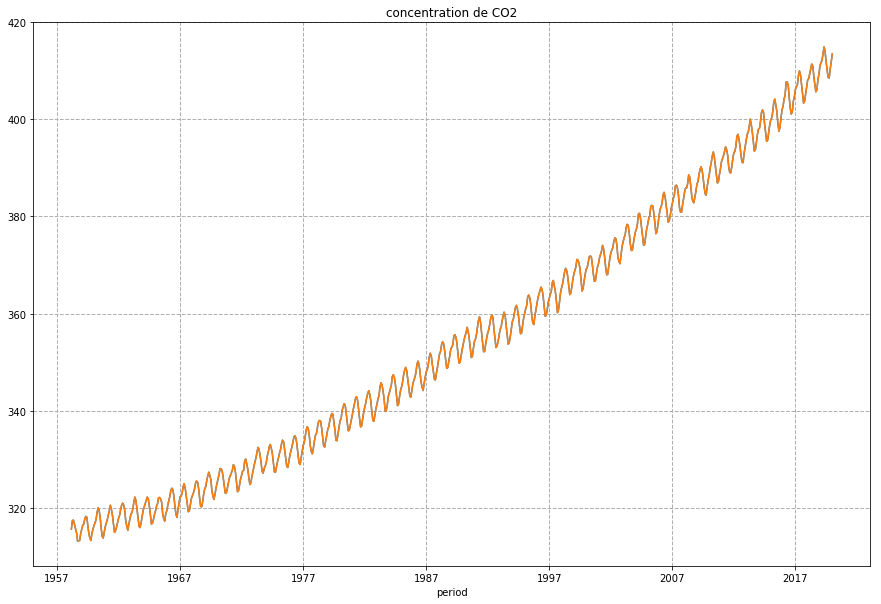

In [98]:
data1['s1'].plot(title = 'concentration de CO2',);
data1['s1'].plot(figsize=(15, 10),).grid(linestyle='--', linewidth=1);

Nous allons approximé la concentration de CO2 avec une droite, puis faire la différence pour 
n'obtenir que les variations de la concentration de CO2.

[Text(0,0.5,'Concentration (ppm)'),
 Text(0.5,0,'Période'),
 Text(0.5,1,'Concentration CO2')]

[Text(0,0.5,'Concentration (ppm)'),
 Text(0.5,0,'Période'),
 Text(0.5,1,'Variation de la concentration CO2')]

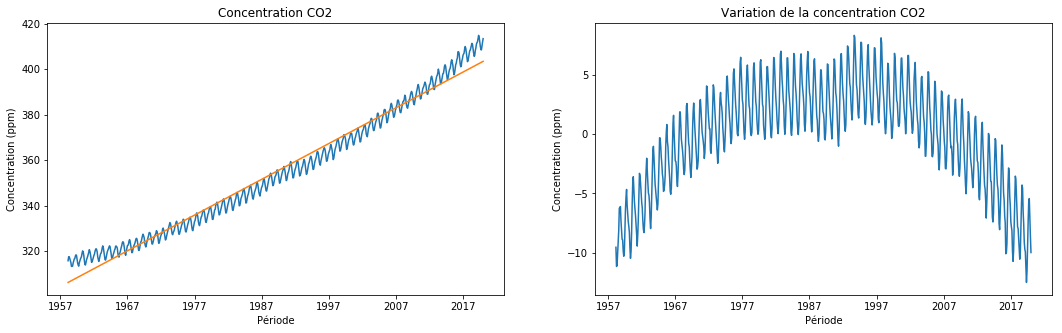

In [118]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data1['Date 2'], data1['s1'])
def predict(x):
    return slope*x+intercept

data1['reg_lineaire'] = predict(data1['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#plot(figsize=(8, 5))  .plot(figsize=(15, 10), grid=True).grid(linestyle='--', linewidth=1);

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data1['s1'])
#data1['s1'].plot()
ax1.plot(data1['reg_lineaire']) 
data1['co2'] = data1['reg_lineaire']-data1['s1']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data1['co2']) 